# Class 04 - Segmentation

In [238]:
import pandas as pd

In [239]:
df_customers = pd.read_csv("./customers.csv")
df_customers

,id,idade,renda_anual,pontuacao_gastos
0,1,56,94740,90
1,2,69,136352,50
2,3,46,86617,62
3,4,32,114841,97
4,5,60,36896,51
...,...,...,...,...
495,496,43,127825,96
496,497,70,75393,86
497,498,40,93553,54
498,499,26,26941,91


## EDA

In [240]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id                500 non-null    int64
 1   idade             500 non-null    int64
 2   renda_anual       500 non-null    int64
 3   pontuacao_gastos  500 non-null    int64
dtypes: int64(4)
memory usage: 15.8 KB


In [241]:
df_customers.describe()

,id,idade,renda_anual,pontuacao_gastos
count,500.000000,500.000000,500.000000,500.000000
mean,250.500000,44.732000,81557.166000,48.512000
std,144.481833,15.239707,36764.379945,29.556946
min,1.000000,18.000000,20384.000000,0.000000
25%,125.750000,32.000000,49172.750000,24.000000
50%,250.500000,45.000000,79219.000000,48.500000
75%,375.250000,57.000000,113017.250000,73.250000
max,500.000000,70.000000,149695.000000,100.000000


In [242]:
df_customers.corr()

,id,idade,renda_anual,pontuacao_gastos
id,1.000000,0.058039,-0.064297,-0.011668
idade,0.058039,1.000000,0.010425,0.004163
renda_anual,-0.064297,0.010425,1.000000,-0.040071
pontuacao_gastos,-0.011668,0.004163,-0.040071,1.000000


<Axes: xlabel='pontuacao_gastos', ylabel='renda_anual'>

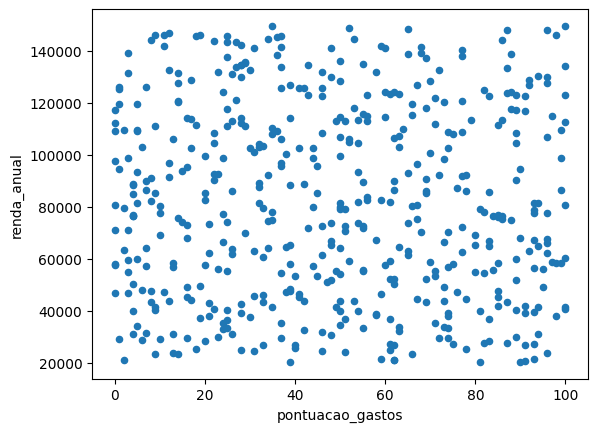

In [243]:
df_customers.plot.scatter(x="pontuacao_gastos", y="renda_anual")

## Model

In [244]:
from sklearn.preprocessing import StandardScaler

In [245]:
std = StandardScaler()
data_std = std.fit_transform(df_customers[["idade", "renda_anual", "pontuacao_gastos"]])
data_std

array([[ 0.74012478,  0.35893538,  1.40506904],
       [ 1.59401387,  1.49192537,  0.05039391],
       [ 0.08328703,  0.13776654,  0.45679645],
       ...,
       [-0.31081563,  0.32661636,  0.18586143],
       [-1.23038848, -1.48706069,  1.43893592],
       [-1.03333716, -0.96992912, -0.59307677]], shape=(500, 3))

In [246]:
from sklearn.cluster import KMeans

In [247]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(data_std)

,n_clusters,5
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [248]:
df_customers["cluster"] = kmeans.labels_
df_customers

,id,idade,renda_anual,pontuacao_gastos,cluster
0,1,56,94740,90,2
1,2,69,136352,50,1
2,3,46,86617,62,2
3,4,32,114841,97,4
4,5,60,36896,51,0
...,...,...,...,...,...
495,496,43,127825,96,2
496,497,70,75393,86,2
497,498,40,93553,54,1
498,499,26,26941,91,4


In [249]:
centroids = kmeans.cluster_centers_
centroids

array([[ 0.71823019, -0.74358706, -0.68857526],
       [ 0.41348114,  1.19468515, -0.15128182],
       [ 0.76226538, -0.15848346,  1.04623234],
       [-1.08747214,  0.17968669, -0.99278036],
       [-0.96430217, -0.53386071,  0.9229844 ]])

In [251]:
df_clusters = df_customers.groupby("cluster").agg({
  "id": "count",
  "idade": "mean",
  "renda_anual": "mean",
  "pontuacao_gastos": "mean"
})

df_clusters

,id,idade,renda_anual,pontuacao_gastos
cluster,,,,
0,111,55.666667,54247.000000,28.180180
1,111,51.027027,125435.081081,44.045045
2,89,56.337079,75736.449438,79.404494
3,91,28.175824,88156.626374,19.197802
4,98,30.051020,61949.744898,75.765306


<Axes: ylabel='Frequency'>

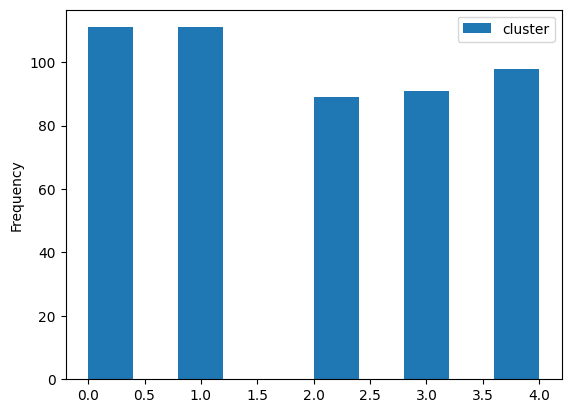

In [254]:
df_customers.plot.hist(y="cluster")

In [258]:
df_customers[df_customers["cluster"] == 3]

,id,idade,renda_anual,pontuacao_gastos,cluster
5,6,25,145729,37,3
12,13,41,76556,4,3
17,18,20,73222,16,3
25,26,19,105067,52,3
28,29,29,89042,42,3
...,...,...,...,...,...
485,486,30,97709,0,3
489,490,36,79494,2,3
490,491,34,101317,31,3
491,492,36,85215,9,3
